In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from optuna.samplers import TPESampler
import optuna
import unicodedata
import re
from fuzzywuzzy import process
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from catboost import Pool
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

c:\Users\Pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\Pc\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
train = pd.read_csv(r'C:\Users\Pc\Desktop\python çalışmaları\train_son_hal_13_23.01.csv')
test = pd.read_csv(r'C:\Users\Pc\Desktop\python çalışmaları\test_son_hal_13_23.01.csv')

In [15]:
b = pd.read_csv(r'c:\Users\Pc\Desktop\btk datathon\train.csv')

In [54]:
b.iloc[3232]

Basvuru Yili                                                                        2019
Degerlendirme Puani                                                                  2.0
Cinsiyet                                                                           ERKEK
Dogum Tarihi                                                                    7/4/2000
Dogum Yeri                                                                       Erzurum
Ikametgah Sehri                                                                  Erzurum
Universite Adi                                                      ATATÜRK ÜNİVERSİTESİ
Universite Turu                                                                   DEVLET
Burslu ise Burs Yuzdesi                                                            100.0
Burs Aliyor mu?                                                                     EVET
Bölüm                                                        Halkla İlişkiler ve Tanıtım
Universite Kacinci Si

In [55]:
train[train['Degerlendirme Puani'] > 95].head(50)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Sehir,Lise Turu,Lise Bolumu,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id,Yil,yaş,yaş_grubu,Anne Egitim Durumu Puan,Baba Egitim Durumu Puan,Ortalama Egitim Puan,girişimci_stk_etiket,dogum_ikametgah,buyuk_sehir,Burs,Calisma Durumu,Burs Miktarı Temiz,dolar_kur,Burs_per_usd,uni_not_ort
187,2014,98.0,kadın,ankara,ankara,ihsan doğramaci bilkent,özel,100.0,evet,endüstri mühendisliği,2,3.00-4.00,hayır,Diğer,ankara,fen lisesi,mf,85-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,kamu,lise,emekli,yok,1.0,evet,Diğer,evet,diğer,evet,Diğer,evet,hayır,bilinmiyor,bilinmiyor,bilinmiyor,187,1994,20,Genç,5,4,4.5,girişimci ve sosyal,1,1,1.00,0,0,2.19,0.00,0
1425,2016,96.0,erkek,Diğer,istanbul,istanbul bilgi üniversitesi,özel,100.0,evet,bilgisayar mühendisliği,1,3.00-4.00,hayır,Diğer,bursa,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,lise,emekli,bilinmiyor,2.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,1425,1996,20,Genç,4,4,4.0,girişimci ve sosyal,0,0,1.00,0,0,3.02,0.00,0
1490,2016,96.0,erkek,istanbul,istanbul,özyeğin üniversitesi,özel,100.0,evet,hukuk,2,2.50-3.00,hayır,Diğer,istanbul,anadolu lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,lise,emekli,bilinmiyor,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,hayır,bilinmiyor,evet,ileri,1490,1995,21,Genç,4,4,4.0,girişimci ve sosyal,1,0,1.00,0,0,3.02,0.00,0
1691,2016,102.0,kadın,ankara,istanbul,koç üniversitesi,özel,100.0,evet,psikoloji,2,3.00-4.00,hayır,Diğer,ankara,özel lise,sayisal,bilinmiyor,evet,Diğer,Diğer,lise,hayır,bilinmiyor,üniversite,emekli,bilinmiyor,3.0,evet,Diğer,evet,kaptan,evet,lösev,evet,evet,bilinmiyor,evet,ileri,1691,1995,21,Genç,4,5,4.5,girişimci ve sosyal,0,0,1.00,0,600,3.02,198.68,1
1737,2016,96.0,kadın,erzurum,istanbul,okan üniversitesi,özel,100.0,evet,mimarlık,2,2.50-3.00,hayır,Diğer,aydın,anadolu lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,evet,özel sektör,lise,evet,kamu,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,1737,1995,21,Genç,4,4,4.0,girişimci ve sosyal,0,0,1.00,1,0,3.02,0.00,0
6892,2016,96.0,kadın,istanbul,istanbul,bahçeşehir üniversitesi,özel,50.0,evet,uluslararası ticaret ve işletmecilik,3,2.50-3.00,hayır,Diğer,istanbul,anadolu lisesi,esit agirlik,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,emekli,bilinmiyor,lise,emekli,bilinmiyor,1.0,evet,Diğer,evet,kaptan,evet,tegv,evet,evet,bilinmiyor,evet,ileri,6892,1995,21,Genç,4,4,4.0,girişimci ve sosyal,1,0,0.50,0,0,3.02,0.00,0
6953,2016,96.0,erkek,kayseri,istanbul,Diğer,özel,50.0,evet,endüstri mühendisliği,4,2.50-3.00,hayır,Diğer,kayseri,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,üniversite,evet,özel sektör,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,6953,1994,22,Genç,4,5,4.5,girişimci ve sosyal,0,0,0.50,0,0,3.02,0.00,0
6954,2016,96.0,erkek,kayseri,istanbul,Diğer,özel,50.0,evet,endüstri mühendisliği,4,2.50-3.00,hayır,Diğer,kayseri,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,üniversite,evet,özel sektör,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,iler

In [3]:
benim_submission = pd.read_csv(r'C:\Users\Pc\Desktop\btk\bu daha iyi olcek.csv')

In [7]:
test['y_pred'] = benim_submission['Degerlendirme Puani']
test.sort_values(by='y_pred', ascending = False).head(20)

,Basvuru Yili,Cinsiyet,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Sehir,Lise Turu,Lise Bolumu,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id,Yil,yaş,yaş_grubu,Anne Egitim Durumu Puan,Baba Egitim Durumu Puan,Ortalama Egitim Puan,girişimci_stk_etiket,dogum_ikametgah,buyuk_sehir,Burs,Calisma Durumu,Burs Miktarı Temiz,dolar_kur,Burs_per_usd,uni_not_ort,y_pred
5338,2023,kadın,antalya,istanbul,boğaziçi üniversitesi,devlet,0.0,hayır,kimya mühendisliği,3,2.50-3.00,hayır,Diğer,isparta,özel lise,saysal,75-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,kamu,üniversite,hayır,yok,1.0,evet,bilinmiyor,evet,diğer,evet,Diğer,bilinmiyor,evet,deneyim var,evet,bilinmiyor,5338,2002,21,Genç,5,5,5.0,girişimci ve sosyal,0,0,0.0,0,0.0,19.05,0.00,0,66.000805
9411,2023,kadın,aydin,istanbul,boğaziçi üniversitesi,devlet,0.0,hayır,yönetim bilişim sistemleri,4,2.50-3.00,hayır,Diğer,istanbul,devlet,esit agrlk,75-100,hayır,bilinmiyor,burs almıyor,lise,evet,özel sektör,lise,evet,kamu,0.0,evet,bilinmiyor,evet,bireysel spor,evet,aiesec,bilinmiyor,evet,deneyim var,evet,bilinmiyor,9411,2000,23,Genç,4,4,4.0,girişimci ve sosyal,0,0,0.0,1,0.0,19.05,0.00,0,64.984653
4574,2023,kadın,Diğer,istanbul,istanbul teknik üniversitesi,devlet,0.0,hayır,inşaat mühendisliği,2,2.50-3.00,hayır,Diğer,istanbul,devlet,saysal,75-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,kamu,doktora,evet,kamu,1.0,evet,bilinmiyor,evet,bireysel spor,evet,Diğer,bilinmiyor,evet,deneyim var,evet,bilinmiyor,4574,2003,20,Genç,5,7,6.0,girişimci ve sosyal,0,0,0.0,1,0.0,19.05,0.00,0,64.779348
2191,2023,kadın,istanbul,istanbul,istanbul teknik üniversitesi,devlet,0.0,hayır,bilgisayar mühendisliği,3,2.50-3.00,hayır,Diğer,istanbul,özel lise,saysal,75-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,özel sektör,üniversite,evet,özel sektör,1.0,evet,bilinmiyor,evet,bireysel spor,evet,Diğer,bilinmiyor,evet,deneyim var,evet,bilinmiyor,2191,2003,20,Genç,5,5,5.0,girişimci ve sosyal,1,0,0.0,1,0.0,19.05,0.00,0,64.240625
7140,2023,kadın,antalya,istanbul,bahçeşehir üniversitesi,özel,50.0,evet,endüstri mühendisliği,2,2.50-3.00,hayır,Diğer,kırklareli,özel lise,saysal,75-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,diğer,yüksek lisans,evet,kamu,1.0,evet,bilinmiyor,evet,bireysel spor,evet,Diğer,bilinmiyor,evet,deneyim var,evet,bilinmiyor,7140,2004,19,Genç,5,6,5.5,girişimci ve sosyal,0,0,0.5,1,0.0,19.05,0.00,0,64.067429
6072,2023,kadın,malatya,istanbul,yıldız teknik üniversitesi,devlet,0.0,hayır,moleküler biyoloji ve genetik,4,2.50-3.00,hayır,Diğer,elazığ,devlet,saysal,75-100,evet,kyk,1000₺ ve üstü,üniversite,evet,kamu,üniversite,evet,kamu,1.0,evet,bilinmiyor,evet,bireysel spor,evet,Diğer,bilinmiyor,evet,deneyim var,evet,bilinmiyor,6072,2002,21,Genç,5,5,5.0,girişimci ve sosyal,0,0,0.0,1,1000.0,19.05,52.49,0,63.878765
6864,2023,erkek,nevsehir,istanbul,boğaziçi üniversitesi,devlet,0.0,hayır,iktisat,3,2.50-3.00,hayır,Diğer,ankara,devlet,esit agrlk,75-100,evet,kyk,1000₺ ve üstü,üniversite,evet,kamu,üniversite,evet,kamu,1.0,evet,bilinmiyor,evet,bireysel spor,evet,aiesec,bilinmiyor,evet,deneyim var,evet,bilinmiyor,6864,2002,21,Genç,5,5,5.0,girişimci ve sosyal,0,0,0.0,1,1000.0,19.05,52.49,0,63.530429
7499,2023,erkek,istanbul,istanbul,galatasaray üniversitesi,devlet,0.0,hayır,hukuk,3,2.

In [47]:
b = pd.read_csv(r'C:\Users\Pc\Desktop\python çalışmaları\test_son_hal_13_23.01.csv')

In [5]:
def categorical_examiner(df, col, colors_set = 0, hue = False, rotation = True, percentage = False):
    df = df.sort_values(by = col, ascending = False)
    unique_rows = df[col].nunique()
    if df[col].value_counts().shape[0] > 10:
        index = df[col].value_counts().head(10).index
        df[col] = df[df[col].isin(index)][col]
    colors = sns.color_palette(n_colors = unique_rows)
    f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,6))
    if hue == False:
        sns.countplot(df, x = col, palette = colors, ax = ax)
        plt.suptitle(f'COL:{col} COUNT PLOT')
    else:
        sns.histplot(df, x = col, hue = hue, palette = colors, ax = ax, bins = 100)
        plt.suptitle(f'COL:{col} COUNT PLOT')       
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Yüzde değerlerini grafik üzerinde göstermek için
    count = df[col].value_counts(normalize=True) * 100  # Yüzdeleri alıyoruz
    categories = df[col].unique()  # Benzersiz kategorileri alıyoruz

    if percentage == True:
        for category in categories:
            value = count.get(category, 0)  # İlgili kategorinin yüzdesini alıyoruz
            position = list(df[col].unique()).index(category)  # Kategorinin pozisyonunu alıyoruz
            plt.text(position, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')
    plt.tight_layout()
    return plt.show()

In [6]:
def numerical_examiner(df, col, log = False, bins = 100, inf = False):
    f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))
    ax11, ax12 = ax[0][0], ax[0][1]      
    sns.histplot(df, x = col, bins = bins, ax = ax11)
    sns.boxplot(df, x = col, ax = ax12)
    ax11.set_title('Histogram')
    ax12.set_title('Boxplot')
    if log == True:
        temp = df.copy()
        temp[col] = np.log10(temp[col])
        temp[col] = np.log10(temp[col])
        ax21, ax22 = ax[1][0], ax[1][1]
        if inf == True:
            temp[col] = temp[col].replace([float(inf), float(-inf), np.nan, -np.nan], 0)
            sns.histplot(temp, x = col, bins = bins, ax = ax21)
            sns.boxplot(temp, x = col, ax = ax22)
        else:
            sns.histplot(temp, x = col, bins = bins, ax = ax21)
            sns.boxplot(temp, x = col, ax = ax22)
    plt.suptitle(f'Column:{col}, MIN:{df[col].min()}, MAX:{df[col].max()}')
    plt.tight_layout()
    return plt.show()

In [2]:
train = pd.read_csv(r'C:\Users\Pc\Desktop\btk\15 eylül 07.02 train.csv')

In [3]:
column_groups = {
    'categorical_columns' : ["Cinsiyet", "Dogum Yeri", "Ikametgah Sehri", "Universite Adi", "Universite Turu",
                             "Burs Aliyor mu?", "Bölüm", "Universite Kacinci Sinif", "Universite Not Ortalamasi",
                             "Lise Adi Yeni", "Lise Sehir", "Lise Turu", "Baba_Calisma_Durumu", 
                             "Lise Bolumu", "Lise Mezuniyet Notu", "Baska Bir Kurumdan Burs Aliyor mu?", "Burs Aldigi Baska Kurum",
                             "Anne Egitim Durumu", "Anne Calisma Durumu", "Anne Sektor", "Baba Egitim Durumu", "Baba Calisma Durumu",
                             "Baba Sektor", "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",
                             "Profesyonel Bir Spor Daliyla Mesgul musunuz?", "Spor Dalindaki Rolunuz Nedir?", "Aktif olarak bir STK üyesi misiniz?",
                             "Hangi STK'nin Uyesisiniz?", "Stk Projesine Katildiniz Mi?", "Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                             "Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?", "Ingilizce Biliyor musunuz?", "Ingilizce Seviyeniz?",
                             "yaş_grubu", "girisimci_stk_etiket", "uni_burs","Universite Rank"],
    'numerical_columns' : ['yaş', 'Anne Egitim Durumu Puan', 'Baba Egitim Durumu Puan', 'Burs','Burs Miktarı Temiz', 'dogum_ikametgah',
                           'buyuk_sehir','Kardes Sayisi', 'Ortalama Egitim Puan', 'üni_not_ort','Aile Egitim Durumu', 'genel_girişimci_degerlendirme'],
    'target'            : ['Degerlendirme Puani']
}

In [4]:
categorical_columns = ["Cinsiyet", "Dogum Yeri", "Ikametgah Sehri", "Universite Adi", "Universite Turu",
                             "Burs Aliyor mu?", "Bölüm", "Universite Kacinci Sinif", "Universite Not Ortalamasi",
                             "Lise Adi Yeni", "Lise Sehir", "Lise Turu", "Baba_Calisma_Durumu", 
                             "Lise Bolumu", "Lise Mezuniyet Notu", "Baska Bir Kurumdan Burs Aliyor mu?", "Burs Aldigi Baska Kurum",
                             "Anne Egitim Durumu", "Anne Calisma Durumu", "Anne Sektor", "Baba Egitim Durumu", "Baba Calisma Durumu",
                             "Baba Sektor", "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",
                             "Profesyonel Bir Spor Daliyla Mesgul musunuz?", "Spor Dalindaki Rolunuz Nedir?", "Aktif olarak bir STK üyesi misiniz?",
                             "Hangi STK'nin Uyesisiniz?", "Stk Projesine Katildiniz Mi?", "Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                             "Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?", "Ingilizce Biliyor musunuz?", "Ingilizce Seviyeniz?",
                             "yaş_grubu", "girisimci_stk_etiket", "uni_burs","Universite Rank"]

numeric_columns = column_groups['numerical_columns']

In [5]:
training_columns = column_groups['categorical_columns'] + column_groups['numerical_columns']

In [6]:
for columns in categorical_columns:
    train[columns] = train[columns].astype('str')
for columns in numeric_columns:
    train[columns] = train[columns].astype('int64')

In [6]:
for columns in categorical_columns:
    test[columns] = test[columns].astype('str')
for columns in numeric_columns:
    test[columns] = test[columns].astype('int64')

In [7]:
oof_data, non_oof_train_data = train_test_split(train, test_size=0.9, random_state = 42)

# Optuna ile optimizasyon için tanımlama
def objective(trial):
    # Optuna'nın deneyeceği parametre aralıklarını belirliyoruz
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-2, 15.0),
        'loss_function': 'RMSE',
        'early_stopping_rounds': 10,
        'verbose': 100,
    }

    # K-fold cross-validation ile modelin doğruluğunu ölçüyoruz
    kf = KFold(n_splits=5)
    cv_scores = []
    
    for train_index, test_index in kf.split(non_oof_train_data[training_columns]):
        X_train_fold, X_test_fold = non_oof_train_data.iloc[train_index], non_oof_train_data.iloc[test_index]
        y_train_fold, y_test_fold = X_train_fold['Degerlendirme Puani'], X_test_fold['Degerlendirme Puani']

        train_pool = Pool(X_train_fold[training_columns], y_train_fold, cat_features=categorical_columns)
        test_pool = Pool(X_test_fold[training_columns], y_test_fold, cat_features=categorical_columns)

        model = CatBoostRegressor(**params)
        model.fit(train_pool, eval_set=test_pool, use_best_model=True)

        y_pred = model.predict(X_test_fold[training_columns])
        rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
        cv_scores.append(rmse)
    
    return np.mean(cv_scores)

# Optuna ile deneme
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=60)

# En iyi parametreleri alalım
print('Best trial: RMSE: {}'.format(study.best_value))
print('Best params: {}'.format(study.best_params))

# En iyi parametrelerle final modeli eğitme
best_params = study.best_params
best_model = CatBoostRegressor(**best_params, task_type='GPU', verbose=100)
train_pool_oof = Pool(oof_data[training_columns], oof_data['Degerlendirme Puani'], cat_features=categorical_columns)
best_model.fit(train_pool_oof)

# OOF seti üzerinde tahmin yapma ve RMSE hesaplama
y_pred_oof = best_model.predict(oof_data[training_columns])
rmse_oof = np.sqrt(mean_squared_error(oof_data['Degerlendirme Puani'], y_pred_oof))
print(f"OOF RMSE: {rmse_oof:.4f}")

[I 2024-09-15 07:06:23,826] A new study created in memory with name: no-name-9b563287-ee98-47b0-982d-3544a9a35b64


0:	learn: 14.7237969	test: 14.6552329	best: 14.6552329 (0)	total: 248ms	remaining: 5m 12s
100:	learn: 6.9597230	test: 7.0256472	best: 7.0256472 (100)	total: 7.07s	remaining: 1m 21s
200:	learn: 6.3880962	test: 6.4738303	best: 6.4738303 (200)	total: 13.9s	remaining: 1m 13s
300:	learn: 6.1751220	test: 6.2804936	best: 6.2804936 (300)	total: 20.8s	remaining: 1m 6s
400:	learn: 6.0837623	test: 6.2028117	best: 6.2028117 (400)	total: 27.1s	remaining: 58.2s
500:	learn: 6.0149905	test: 6.1496122	best: 6.1496111 (499)	total: 34.1s	remaining: 51.8s
600:	learn: 5.9746401	test: 6.1210916	best: 6.1210916 (600)	total: 40.9s	remaining: 44.9s
700:	learn: 5.9425163	test: 6.1015731	best: 6.1015731 (700)	total: 47.4s	remaining: 37.8s
800:	learn: 5.9114328	test: 6.0786476	best: 6.0786476 (800)	total: 53.7s	remaining: 30.9s
900:	learn: 5.8870550	test: 6.0631601	best: 6.0631601 (900)	total: 1m	remaining: 24s
1000:	learn: 5.8672989	test: 6.0521666	best: 6.0521666 (1000)	total: 1m 6s	remaining: 17.3s
1100:	learn

[I 2024-09-15 07:12:59,667] Trial 0 finished with value: 5.965240454089605 and parameters: {'iterations': 1261, 'learning_rate': 0.07356250711642473, 'depth': 4, 'l2_leaf_reg': 4.367184108346651, 'bagging_temperature': 0.7045555251846354, 'random_strength': 6.919137538030769}. Best is trial 0 with value: 5.965240454089605.


0:	learn: 15.0433555	test: 14.9643375	best: 14.9643375 (0)	total: 198ms	remaining: 2m 31s
100:	learn: 6.9579938	test: 7.0715922	best: 7.0715922 (100)	total: 20.6s	remaining: 2m 15s
200:	learn: 6.4113359	test: 6.5588939	best: 6.5588939 (200)	total: 40.5s	remaining: 1m 53s
300:	learn: 6.2399246	test: 6.4092800	best: 6.4092800 (300)	total: 58.3s	remaining: 1m 29s
400:	learn: 6.0509299	test: 6.2658378	best: 6.2658378 (400)	total: 1m 17s	remaining: 1m 9s
500:	learn: 5.8464149	test: 6.1371252	best: 6.1371252 (500)	total: 1m 44s	remaining: 54.7s
600:	learn: 5.7183559	test: 6.0773793	best: 6.0773793 (600)	total: 2m 24s	remaining: 39.2s
700:	learn: 5.6267114	test: 6.0417842	best: 6.0417842 (700)	total: 3m 3s	remaining: 16.5s
763:	learn: 5.5796693	test: 6.0281887	best: 6.0281887 (763)	total: 3m 31s	remaining: 0us

bestTest = 6.028188657
bestIteration = 763

0:	learn: 15.0165065	test: 15.0009960	best: 15.0009960 (0)	total: 223ms	remaining: 2m 50s
100:	learn: 6.9961275	test: 6.9530053	best: 6.9530

[I 2024-09-15 07:34:30,651] Trial 1 finished with value: 5.936966120065409 and parameters: {'iterations': 764, 'learning_rate': 0.030612324650227354, 'depth': 8, 'l2_leaf_reg': 0.2803366701307998, 'bagging_temperature': 0.0837726433707191, 'random_strength': 5.082312303353252}. Best is trial 1 with value: 5.936966120065409.


0:	learn: 14.6599591	test: 14.5920913	best: 14.5920913 (0)	total: 86.1ms	remaining: 1m 13s
100:	learn: 6.6009087	test: 6.6961922	best: 6.6961922 (100)	total: 13.8s	remaining: 1m 42s
200:	learn: 6.2364125	test: 6.3420312	best: 6.3420312 (200)	total: 28.1s	remaining: 1m 31s
300:	learn: 6.1307503	test: 6.2484784	best: 6.2484784 (300)	total: 41.5s	remaining: 1m 16s
400:	learn: 6.0648551	test: 6.1896867	best: 6.1896867 (400)	total: 54.5s	remaining: 1m 1s
500:	learn: 6.0154566	test: 6.1469130	best: 6.1469130 (500)	total: 1m 8s	remaining: 48.6s
600:	learn: 5.9820968	test: 6.1246862	best: 6.1246862 (600)	total: 1m 23s	remaining: 35.4s
700:	learn: 5.9565338	test: 6.1097737	best: 6.1097595 (697)	total: 1m 37s	remaining: 21.5s
800:	learn: 5.9363855	test: 6.0988751	best: 6.0988751 (800)	total: 1m 51s	remaining: 7.63s
855:	learn: 5.9272477	test: 6.0941480	best: 6.0941480 (855)	total: 1m 59s	remaining: 0us

bestTest = 6.094148015
bestIteration = 855

0:	learn: 14.6637110	test: 14.6455919	best: 14.64

[I 2024-09-15 07:44:31,802] Trial 2 finished with value: 5.992087265751858 and parameters: {'iterations': 856, 'learning_rate': 0.07230306372422665, 'depth': 4, 'l2_leaf_reg': 9.281824990317876, 'bagging_temperature': 0.13886020307798552, 'random_strength': 0.21331172788605368}. Best is trial 1 with value: 5.936966120065409.


0:	learn: 14.7099706	test: 14.6408059	best: 14.6408059 (0)	total: 128ms	remaining: 2m 28s
100:	learn: 6.2506629	test: 6.4250700	best: 6.4250700 (100)	total: 39.8s	remaining: 6m 56s
200:	learn: 5.8728209	test: 6.1533481	best: 6.1533481 (200)	total: 1m 21s	remaining: 6m 30s
300:	learn: 5.6731993	test: 6.0676582	best: 6.0674914 (297)	total: 2m 6s	remaining: 5m 59s
400:	learn: 5.5637711	test: 6.0327532	best: 6.0327532 (400)	total: 2m 54s	remaining: 5m 29s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.017848833
bestIteration = 481

Shrink model to first 482 iterations.
0:	learn: 14.6470442	test: 14.6238871	best: 14.6238871 (0)	total: 286ms	remaining: 5m 30s
100:	learn: 6.3264140	test: 6.2975718	best: 6.2975718 (100)	total: 39.9s	remaining: 6m 58s
200:	learn: 5.9556435	test: 6.0262463	best: 6.0258855 (199)	total: 1m 19s	remaining: 6m 17s
300:	learn: 5.7486080	test: 5.9196403	best: 5.9196403 (300)	total: 2m 3s	remaining: 5m 50s
400:	learn: 5.6161475	test: 5.8850209	best:

[I 2024-09-15 07:59:48,699] Trial 3 finished with value: 5.939409244889577 and parameters: {'iterations': 1159, 'learning_rate': 0.06780693305866649, 'depth': 9, 'l2_leaf_reg': 6.912818569704481, 'bagging_temperature': 0.20567417559980383, 'random_strength': 3.944634218996009}. Best is trial 1 with value: 5.936966120065409.


0:	learn: 14.6257063	test: 14.5585599	best: 14.5585599 (0)	total: 178ms	remaining: 3m 5s
100:	learn: 6.1028817	test: 6.3500066	best: 6.3500066 (100)	total: 58.9s	remaining: 9m 9s
200:	learn: 5.6108647	test: 6.0969001	best: 6.0969001 (200)	total: 2m 5s	remaining: 8m 46s
300:	learn: 5.3157546	test: 6.0350587	best: 6.0350587 (300)	total: 3m 20s	remaining: 8m 15s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.019104574
bestIteration = 361

Shrink model to first 362 iterations.
0:	learn: 14.5535644	test: 14.5292251	best: 14.5292251 (0)	total: 530ms	remaining: 9m 12s
100:	learn: 6.1678895	test: 6.2456670	best: 6.2456670 (100)	total: 58.9s	remaining: 9m 9s
200:	learn: 5.6582076	test: 5.9723512	best: 5.9723512 (200)	total: 2m 6s	remaining: 8m 51s
300:	learn: 5.3610984	test: 5.9117979	best: 5.9117979 (300)	total: 3m 18s	remaining: 8m 8s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 5.895602426
bestIteration = 371

Shrink model to first 372 iterations.
0:

[I 2024-09-15 08:21:39,920] Trial 4 finished with value: 5.937052358965322 and parameters: {'iterations': 1043, 'learning_rate': 0.07710717965830505, 'depth': 10, 'l2_leaf_reg': 3.6419241985769197, 'bagging_temperature': 0.5054441865613225, 'random_strength': 4.076787309955248}. Best is trial 1 with value: 5.936966120065409.


0:	learn: 14.9232276	test: 14.8483330	best: 14.8483330 (0)	total: 110ms	remaining: 1m 55s
100:	learn: 6.7821469	test: 6.8865070	best: 6.8865070 (100)	total: 17.9s	remaining: 2m 47s
200:	learn: 6.3166163	test: 6.4319764	best: 6.4319764 (200)	total: 34s	remaining: 2m 23s
300:	learn: 6.1304419	test: 6.2609951	best: 6.2609951 (300)	total: 50.8s	remaining: 2m 6s
400:	learn: 6.0249405	test: 6.1737459	best: 6.1737459 (400)	total: 1m 6s	remaining: 1m 47s
500:	learn: 5.9612509	test: 6.1271157	best: 6.1271157 (500)	total: 1m 25s	remaining: 1m 33s
600:	learn: 5.9200524	test: 6.0994338	best: 6.0994338 (600)	total: 1m 42s	remaining: 1m 16s
700:	learn: 5.8862779	test: 6.0801214	best: 6.0801214 (700)	total: 1m 59s	remaining: 59.1s
800:	learn: 5.8570716	test: 6.0623599	best: 6.0623599 (800)	total: 2m 18s	remaining: 43s
900:	learn: 5.8358118	test: 6.0528117	best: 6.0528117 (900)	total: 2m 36s	remaining: 25.7s
1000:	learn: 5.8156793	test: 6.0460430	best: 6.0460430 (1000)	total: 2m 53s	remaining: 8.32s
1

[I 2024-09-15 08:36:22,302] Trial 5 finished with value: 5.952324806697837 and parameters: {'iterations': 1049, 'learning_rate': 0.040544975045811005, 'depth': 5, 'l2_leaf_reg': 1.5214959780665986, 'bagging_temperature': 0.023460786195006356, 'random_strength': 0.1045961570734242}. Best is trial 1 with value: 5.936966120065409.


0:	learn: 14.6474216	test: 14.5772972	best: 14.5772972 (0)	total: 142ms	remaining: 2m 59s
100:	learn: 6.4013325	test: 6.5713244	best: 6.5713244 (100)	total: 50.5s	remaining: 9m 41s
200:	learn: 5.7655353	test: 6.1478009	best: 6.1478009 (200)	total: 1m 50s	remaining: 9m 41s
300:	learn: 5.4237020	test: 6.0547739	best: 6.0546712 (294)	total: 3m	remaining: 9m 35s
400:	learn: 5.2031121	test: 6.0213855	best: 6.0213855 (400)	total: 4m 8s	remaining: 8m 53s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.012736827
bestIteration = 459

Shrink model to first 460 iterations.
0:	learn: 14.6331168	test: 14.6162448	best: 14.6162448 (0)	total: 571ms	remaining: 12m
100:	learn: 6.4468817	test: 6.4344693	best: 6.4344693 (100)	total: 53s	remaining: 10m 10s
200:	learn: 5.8117136	test: 6.0199745	best: 6.0199745 (200)	total: 2m 3s	remaining: 10m 51s
300:	learn: 5.4641739	test: 5.9158006	best: 5.9158006 (300)	total: 3m 14s	remaining: 10m 22s
Stopped by overfitting detector  (10 iterations w

[I 2024-09-15 09:04:37,397] Trial 6 finished with value: 5.929593453020529 and parameters: {'iterations': 1263, 'learning_rate': 0.07706611800755991, 'depth': 10, 'l2_leaf_reg': 4.156366048455517, 'bagging_temperature': 0.48377477857206286, 'random_strength': 8.474971966070003}. Best is trial 6 with value: 5.929593453020529.


0:	learn: 14.6983671	test: 14.6295562	best: 14.6295562 (0)	total: 144ms	remaining: 2m 19s
100:	learn: 6.1209966	test: 6.3957443	best: 6.3957443 (100)	total: 1m 4s	remaining: 9m 11s
200:	learn: 5.5987595	test: 6.1378569	best: 6.1378569 (200)	total: 2m 17s	remaining: 8m 40s
300:	learn: 5.1643519	test: 6.0519951	best: 6.0519951 (300)	total: 3m 35s	remaining: 7m 56s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.044302932
bestIteration = 318

Shrink model to first 319 iterations.
0:	learn: 14.6299862	test: 14.6072151	best: 14.6072151 (0)	total: 581ms	remaining: 9m 20s
100:	learn: 6.1930047	test: 6.2532756	best: 6.2532756 (100)	total: 1m 1s	remaining: 8m 48s
200:	learn: 5.6871579	test: 5.9917937	best: 5.9917937 (200)	total: 2m 7s	remaining: 8m 4s
300:	learn: 5.2930378	test: 5.9125235	best: 5.9125235 (300)	total: 3m 24s	remaining: 7m 31s
400:	learn: 4.9719108	test: 5.8891098	best: 5.8890451 (398)	total: 4m 45s	remaining: 6m 41s
Stopped by overfitting detector  (10 iterat

[I 2024-09-15 09:26:44,965] Trial 7 finished with value: 5.936658003008413 and parameters: {'iterations': 965, 'learning_rate': 0.06899694021626517, 'depth': 10, 'l2_leaf_reg': 0.9751271451039926, 'bagging_temperature': 0.4343484395589654, 'random_strength': 4.350486347630004}. Best is trial 6 with value: 5.929593453020529.


0:	learn: 14.8411918	test: 14.7709697	best: 14.7709697 (0)	total: 146ms	remaining: 1m 51s
100:	learn: 6.2234138	test: 6.4426774	best: 6.4426774 (100)	total: 1m 6s	remaining: 7m 12s
200:	learn: 5.9145199	test: 6.2363907	best: 6.2363907 (200)	total: 2m 9s	remaining: 6m
300:	learn: 5.5969194	test: 6.0968680	best: 6.0968680 (300)	total: 3m 19s	remaining: 5m 5s
400:	learn: 5.4463679	test: 6.0545547	best: 6.0545547 (400)	total: 4m 30s	remaining: 4m 3s
500:	learn: 5.3175121	test: 6.0355357	best: 6.0355357 (500)	total: 5m 44s	remaining: 2m 59s
600:	learn: 5.1945192	test: 6.0218865	best: 6.0218358 (598)	total: 6m 59s	remaining: 1m 52s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.013808624
bestIteration = 654

Shrink model to first 655 iterations.
0:	learn: 14.7763116	test: 14.7624518	best: 14.7624518 (0)	total: 812ms	remaining: 10m 17s
100:	learn: 6.2914911	test: 6.3027030	best: 6.3027030 (100)	total: 1m 14s	remaining: 8m 10s
200:	learn: 5.9571178	test: 6.0724524	best: 6.

[I 2024-09-15 10:04:59,565] Trial 8 finished with value: 5.922657089886616 and parameters: {'iterations': 762, 'learning_rate': 0.05362990398443889, 'depth': 10, 'l2_leaf_reg': 5.238776852618506, 'bagging_temperature': 0.7396849303448028, 'random_strength': 3.452677946114953}. Best is trial 8 with value: 5.922657089886616.


0:	learn: 14.6967328	test: 14.6273011	best: 14.6273011 (0)	total: 85.7ms	remaining: 1m 7s
100:	learn: 7.0838364	test: 7.1406629	best: 7.1406629 (100)	total: 12.5s	remaining: 1m 24s
200:	learn: 6.3138834	test: 6.3945231	best: 6.3945231 (200)	total: 25.7s	remaining: 1m 14s
300:	learn: 6.1194789	test: 6.2258365	best: 6.2258365 (300)	total: 37.8s	remaining: 1m
400:	learn: 6.0256456	test: 6.1529994	best: 6.1529994 (400)	total: 51.7s	remaining: 49.5s
500:	learn: 5.9621919	test: 6.1111969	best: 6.1111969 (500)	total: 1m 4s	remaining: 36.8s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.088909376
bestIteration = 589

Shrink model to first 590 iterations.
0:	learn: 14.7071015	test: 14.6239447	best: 14.6239447 (0)	total: 110ms	remaining: 1m 26s
100:	learn: 7.0560479	test: 7.0033288	best: 7.0033288 (100)	total: 11s	remaining: 1m 14s
200:	learn: 6.3263068	test: 6.2297617	best: 6.2297617 (200)	total: 24.5s	remaining: 1m 11s
300:	learn: 6.1467462	test: 6.0537570	best: 6.0537570 

[I 2024-09-15 10:12:25,609] Trial 9 finished with value: 5.991304213223346 and parameters: {'iterations': 785, 'learning_rate': 0.09468228339173197, 'depth': 4, 'l2_leaf_reg': 3.766946418927699, 'bagging_temperature': 0.2032213103623306, 'random_strength': 14.146690141102527}. Best is trial 8 with value: 5.922657089886616.


0:	learn: 15.2304132	test: 15.1486060	best: 15.1486060 (0)	total: 237ms	remaining: 2m 23s
100:	learn: 9.6991376	test: 9.7282964	best: 9.7282964 (100)	total: 25.4s	remaining: 2m 6s
200:	learn: 8.0755932	test: 8.1445050	best: 8.1445050 (200)	total: 49.9s	remaining: 1m 40s
300:	learn: 7.4131355	test: 7.4958934	best: 7.4958934 (300)	total: 1m 13s	remaining: 1m 14s
400:	learn: 7.0567935	test: 7.1458929	best: 7.1458929 (400)	total: 1m 35s	remaining: 48.9s
500:	learn: 6.8619997	test: 6.9546345	best: 6.9546345 (500)	total: 1m 55s	remaining: 24.3s
600:	learn: 6.7500812	test: 6.8489622	best: 6.8489622 (600)	total: 2m 15s	remaining: 1.13s
605:	learn: 6.7448182	test: 6.8438832	best: 6.8438832 (605)	total: 2m 16s	remaining: 0us

bestTest = 6.843883244
bestIteration = 605

0:	learn: 15.2314219	test: 15.2183512	best: 15.2183512 (0)	total: 82.3ms	remaining: 49.8s
100:	learn: 9.7822975	test: 9.7229344	best: 9.7229344 (100)	total: 23s	remaining: 1m 54s
200:	learn: 8.0894724	test: 8.0223324	best: 8.02233

[I 2024-09-15 10:23:54,849] Trial 10 finished with value: 6.732873920302625 and parameters: {'iterations': 606, 'learning_rate': 0.011375226738003695, 'depth': 7, 'l2_leaf_reg': 6.8127290218303465, 'bagging_temperature': 0.9599154519177956, 'random_strength': 10.899561918665697}. Best is trial 8 with value: 5.922657089886616.


0:	learn: 14.8855023	test: 14.8094585	best: 14.8094585 (0)	total: 246ms	remaining: 5m 59s
100:	learn: 6.8341582	test: 6.9323151	best: 6.9323151 (100)	total: 27.1s	remaining: 6m 6s
200:	learn: 6.4173615	test: 6.5465038	best: 6.5465038 (200)	total: 52.8s	remaining: 5m 31s
300:	learn: 6.0039351	test: 6.2069981	best: 6.2069981 (300)	total: 1m 27s	remaining: 5m 37s
400:	learn: 5.8375891	test: 6.0973901	best: 6.0973901 (400)	total: 1m 58s	remaining: 5m 14s
500:	learn: 5.7343252	test: 6.0483617	best: 6.0483617 (500)	total: 2m 31s	remaining: 4m 52s
600:	learn: 5.6624741	test: 6.0302157	best: 6.0302045 (599)	total: 3m 6s	remaining: 4m 27s
700:	learn: 5.5990664	test: 6.0128857	best: 6.0128607 (699)	total: 3m 38s	remaining: 3m 58s
800:	learn: 5.5490181	test: 6.0017259	best: 6.0017246 (799)	total: 4m 14s	remaining: 3m 30s
900:	learn: 5.4942344	test: 5.9936930	best: 5.9936930 (900)	total: 4m 48s	remaining: 3m
Stopped by overfitting detector  (10 iterations wait)

bestTest = 5.987552002
bestIteratio

[I 2024-09-15 10:45:19,543] Trial 11 finished with value: 5.916628489863285 and parameters: {'iterations': 1464, 'learning_rate': 0.050807084613424126, 'depth': 8, 'l2_leaf_reg': 6.173789834881758, 'bagging_temperature': 0.7218136460684543, 'random_strength': 9.63849818781586}. Best is trial 11 with value: 5.916628489863285.


0:	learn: 14.8985956	test: 14.8223111	best: 14.8223111 (0)	total: 198ms	remaining: 4m 53s
100:	learn: 6.9380429	test: 7.0348054	best: 7.0348054 (100)	total: 23.8s	remaining: 5m 25s
200:	learn: 6.4918663	test: 6.6113625	best: 6.6113625 (200)	total: 46.3s	remaining: 4m 55s
300:	learn: 6.1083120	test: 6.2632058	best: 6.2632058 (300)	total: 1m 12s	remaining: 4m 45s
400:	learn: 5.9413588	test: 6.1315198	best: 6.1315198 (400)	total: 1m 38s	remaining: 4m 26s
500:	learn: 5.8549245	test: 6.0766328	best: 6.0766328 (500)	total: 2m 4s	remaining: 4m 4s
600:	learn: 5.7947488	test: 6.0467885	best: 6.0467885 (600)	total: 2m 33s	remaining: 3m 45s
700:	learn: 5.7425593	test: 6.0271621	best: 6.0271621 (700)	total: 3m	remaining: 3m 22s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.023544109
bestIteration = 731

Shrink model to first 732 iterations.
0:	learn: 14.8774449	test: 14.8615055	best: 14.8615055 (0)	total: 187ms	remaining: 4m 37s
100:	learn: 6.9781191	test: 6.9189888	best: 6.9

[I 2024-09-15 11:03:30,986] Trial 12 finished with value: 5.926562943961764 and parameters: {'iterations': 1485, 'learning_rate': 0.04931848911448684, 'depth': 7, 'l2_leaf_reg': 6.6921482524796225, 'bagging_temperature': 0.7487622491980114, 'random_strength': 9.737658426744856}. Best is trial 11 with value: 5.916628489863285.


0:	learn: 14.8802100	test: 14.8042473	best: 14.8042473 (0)	total: 253ms	remaining: 2m 19s
100:	learn: 6.8715884	test: 6.9924928	best: 6.9924928 (100)	total: 29.2s	remaining: 2m 10s
200:	learn: 6.4465419	test: 6.5954721	best: 6.5954721 (200)	total: 53.8s	remaining: 1m 34s
300:	learn: 6.0313798	test: 6.2336324	best: 6.2336324 (300)	total: 1m 25s	remaining: 1m 11s
400:	learn: 5.8781542	test: 6.1230948	best: 6.1230948 (400)	total: 1m 58s	remaining: 45.1s
500:	learn: 5.7810669	test: 6.0738317	best: 6.0738317 (500)	total: 2m 30s	remaining: 15.6s
552:	learn: 5.7410098	test: 6.0539670	best: 6.0539670 (552)	total: 2m 46s	remaining: 0us

bestTest = 6.053966964
bestIteration = 552

0:	learn: 14.9341002	test: 14.9189968	best: 14.9189968 (0)	total: 84.3ms	remaining: 46.5s
100:	learn: 6.9612648	test: 6.9190229	best: 6.9190229 (100)	total: 27.2s	remaining: 2m 1s
200:	learn: 6.5245709	test: 6.4974901	best: 6.4974418 (199)	total: 52.2s	remaining: 1m 31s
300:	learn: 6.0768309	test: 6.0874240	best: 6.087

[I 2024-09-15 11:17:24,912] Trial 13 finished with value: 5.969259823515952 and parameters: {'iterations': 553, 'learning_rate': 0.051495690870524954, 'depth': 8, 'l2_leaf_reg': 8.662503137205576, 'bagging_temperature': 0.7908721814579163, 'random_strength': 11.998342511811215}. Best is trial 11 with value: 5.916628489863285.


0:	learn: 15.0414450	test: 14.9635742	best: 14.9635742 (0)	total: 138ms	remaining: 3m 26s
100:	learn: 7.3399744	test: 7.4175775	best: 7.4175775 (100)	total: 20.4s	remaining: 4m 42s
200:	learn: 6.7128972	test: 6.7979244	best: 6.7979244 (200)	total: 40.2s	remaining: 4m 19s
300:	learn: 6.4714784	test: 6.5719228	best: 6.5719228 (300)	total: 58.5s	remaining: 3m 52s
400:	learn: 6.2448609	test: 6.3632826	best: 6.3632826 (400)	total: 1m 18s	remaining: 3m 35s
500:	learn: 6.0890737	test: 6.2306462	best: 6.2306462 (500)	total: 1m 42s	remaining: 3m 23s
600:	learn: 6.0070740	test: 6.1669704	best: 6.1669704 (600)	total: 2m 2s	remaining: 3m 3s
700:	learn: 5.9477309	test: 6.1238529	best: 6.1238529 (700)	total: 2m 21s	remaining: 2m 41s
800:	learn: 5.9003503	test: 6.0913426	best: 6.0913426 (800)	total: 2m 44s	remaining: 2m 23s
900:	learn: 5.8637912	test: 6.0699186	best: 6.0699186 (900)	total: 3m 8s	remaining: 2m 5s
1000:	learn: 5.8375135	test: 6.0583638	best: 6.0583638 (1000)	total: 3m 32s	remaining: 1m

[I 2024-09-15 11:42:14,925] Trial 14 finished with value: 5.93790432461913 and parameters: {'iterations': 1499, 'learning_rate': 0.03232538317887215, 'depth': 6, 'l2_leaf_reg': 5.630124509432419, 'bagging_temperature': 0.9980042606476842, 'random_strength': 6.745844424447077}. Best is trial 11 with value: 5.916628489863285.


0:	learn: 14.6908171	test: 14.6199664	best: 14.6199664 (0)	total: 274ms	remaining: 3m 17s
100:	learn: 6.1466788	test: 6.3479760	best: 6.3479760 (100)	total: 43.1s	remaining: 4m 25s
200:	learn: 5.8142498	test: 6.1517041	best: 6.1517041 (200)	total: 1m 21s	remaining: 3m 32s
300:	learn: 5.5521617	test: 6.0511342	best: 6.0511342 (300)	total: 2m 3s	remaining: 2m 52s
400:	learn: 5.3975168	test: 6.0220526	best: 6.0220526 (400)	total: 2m 46s	remaining: 2m 13s
500:	learn: 5.2673664	test: 6.0087643	best: 6.0087643 (500)	total: 3m 26s	remaining: 1m 32s
600:	learn: 5.1377748	test: 5.9978078	best: 5.9967774 (596)	total: 4m 12s	remaining: 51.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 5.996777379
bestIteration = 596

Shrink model to first 597 iterations.
0:	learn: 14.6811923	test: 14.6640524	best: 14.6640524 (0)	total: 273ms	remaining: 3m 17s
100:	learn: 6.1823250	test: 6.2126646	best: 6.2126646 (100)	total: 40.7s	remaining: 4m 11s
200:	learn: 5.8766632	test: 6.0264299	best:

[I 2024-09-15 12:00:21,045] Trial 15 finished with value: 5.9144565968369545 and parameters: {'iterations': 724, 'learning_rate': 0.05962492032375959, 'depth': 9, 'l2_leaf_reg': 2.1247804436328175, 'bagging_temperature': 0.6273448169294619, 'random_strength': 2.3978853392044357}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.3013881	test: 14.2389107	best: 14.2389107 (0)	total: 216ms	remaining: 2m 16s
100:	learn: 6.0372199	test: 6.2364863	best: 6.2364863 (100)	total: 33.2s	remaining: 2m 54s
200:	learn: 5.7103229	test: 6.0632318	best: 6.0632318 (200)	total: 1m 7s	remaining: 2m 24s
300:	learn: 5.5666027	test: 6.0257468	best: 6.0257468 (300)	total: 1m 42s	remaining: 1m 53s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.004232345
bestIteration = 386

Shrink model to first 387 iterations.
0:	learn: 14.2820130	test: 14.2640481	best: 14.2640481 (0)	total: 220ms	remaining: 2m 19s
100:	learn: 6.0684640	test: 6.0917890	best: 6.0917890 (100)	total: 31.6s	remaining: 2m 46s
200:	learn: 5.7617366	test: 5.9245302	best: 5.9245302 (200)	total: 1m 2s	remaining: 2m 13s
300:	learn: 5.5833660	test: 5.8787543	best: 5.8785559 (299)	total: 1m 36s	remaining: 1m 46s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 5.874284872
bestIteration = 323

Shrink model to first 324 iterations

[I 2024-09-15 12:09:26,542] Trial 16 finished with value: 5.929466605316593 and parameters: {'iterations': 633, 'learning_rate': 0.09588701266230967, 'depth': 8, 'l2_leaf_reg': 2.7560013819725477, 'bagging_temperature': 0.5926009546193869, 'random_strength': 1.923577037831791}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.7927636	test: 14.7182177	best: 14.7182177 (0)	total: 339ms	remaining: 7m 49s
100:	learn: 6.8261376	test: 6.9657232	best: 6.9657232 (100)	total: 29.6s	remaining: 6m 17s
200:	learn: 6.2613877	test: 6.4665418	best: 6.4665418 (200)	total: 60s	remaining: 5m 54s
300:	learn: 5.7334403	test: 6.1129642	best: 6.1129642 (300)	total: 1m 42s	remaining: 6m 11s
400:	learn: 5.5261589	test: 6.0479348	best: 6.0479348 (400)	total: 2m 24s	remaining: 5m 54s
500:	learn: 5.3697395	test: 6.0212514	best: 6.0212514 (500)	total: 3m 7s	remaining: 5m 32s
600:	learn: 5.2314703	test: 6.0069989	best: 6.0069199 (594)	total: 3m 53s	remaining: 5m 6s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.001554956
bestIteration = 648

Shrink model to first 649 iterations.
0:	learn: 14.7913977	test: 14.7521857	best: 14.7521857 (0)	total: 246ms	remaining: 5m 41s
100:	learn: 6.7146004	test: 6.6945574	best: 6.6945574 (100)	total: 32.3s	remaining: 6m 51s
200:	learn: 6.2901607	test: 6.3169152	best: 6.

[I 2024-09-15 12:29:12,989] Trial 17 finished with value: 5.919125845297466 and parameters: {'iterations': 1388, 'learning_rate': 0.06139314629515169, 'depth': 9, 'l2_leaf_reg': 2.676336343930836, 'bagging_temperature': 0.34798353757119116, 'random_strength': 13.010341085661873}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.9652822	test: 14.8888683	best: 14.8888683 (0)	total: 135ms	remaining: 2m 4s
100:	learn: 6.9256655	test: 7.0376265	best: 7.0376265 (100)	total: 35.7s	remaining: 4m 51s
200:	learn: 6.4439863	test: 6.5921795	best: 6.5921795 (200)	total: 1m 7s	remaining: 4m 3s
300:	learn: 6.1543332	test: 6.3454769	best: 6.3454769 (300)	total: 1m 41s	remaining: 3m 30s
400:	learn: 5.8481848	test: 6.1355962	best: 6.1355962 (400)	total: 2m 22s	remaining: 3m 7s
500:	learn: 5.7417436	test: 6.0825902	best: 6.0825902 (500)	total: 3m 3s	remaining: 2m 36s
600:	learn: 5.6547555	test: 6.0458007	best: 6.0458007 (600)	total: 3m 42s	remaining: 2m
700:	learn: 5.5900356	test: 6.0289143	best: 6.0289143 (700)	total: 4m 25s	remaining: 1m 25s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.020941627
bestIteration = 755

Shrink model to first 756 iterations.
0:	learn: 14.9521709	test: 14.9364670	best: 14.9364670 (0)	total: 270ms	remaining: 4m 9s
100:	learn: 6.9524286	test: 6.8959116	best: 6.8959

[I 2024-09-15 12:56:56,475] Trial 18 finished with value: 5.926103609914156 and parameters: {'iterations': 927, 'learning_rate': 0.04091867973504754, 'depth': 9, 'l2_leaf_reg': 8.10730186434461, 'bagging_temperature': 0.8642865643046316, 'random_strength': 9.169448664522424}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 15.2226847	test: 15.1411502	best: 15.1411502 (0)	total: 156ms	remaining: 1m 45s
100:	learn: 9.4163320	test: 9.4504375	best: 9.4504375 (100)	total: 19.7s	remaining: 1m 52s
200:	learn: 7.7857975	test: 7.8587213	best: 7.8587213 (200)	total: 39.8s	remaining: 1m 34s
300:	learn: 7.1496978	test: 7.2344346	best: 7.2344346 (300)	total: 1m 1s	remaining: 1m 17s
400:	learn: 6.8583103	test: 6.9500603	best: 6.9500603 (400)	total: 1m 21s	remaining: 56.5s
500:	learn: 6.6832643	test: 6.7796568	best: 6.7796568 (500)	total: 1m 41s	remaining: 35.9s
600:	learn: 6.5759515	test: 6.6766235	best: 6.6766235 (600)	total: 2m 1s	remaining: 15.5s
677:	learn: 6.5107220	test: 6.6150484	best: 6.6150484 (677)	total: 2m 15s	remaining: 0us

bestTest = 6.615048355
bestIteration = 677

0:	learn: 15.2106425	test: 15.1974124	best: 15.1974124 (0)	total: 147ms	remaining: 1m 39s
100:	learn: 9.3414155	test: 9.2798374	best: 9.2798374 (100)	total: 18.2s	remaining: 1m 43s
200:	learn: 7.7676049	test: 7.6964143	best: 7.6964

[I 2024-09-15 13:08:06,669] Trial 19 finished with value: 6.513247993843619 and parameters: {'iterations': 678, 'learning_rate': 0.011847295812646444, 'depth': 6, 'l2_leaf_reg': 2.2205691357424184, 'bagging_temperature': 0.5970852020235091, 'random_strength': 6.048250188323264}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.4395341	test: 14.3738993	best: 14.3738993 (0)	total: 231ms	remaining: 4m 17s
100:	learn: 6.1045979	test: 6.2830736	best: 6.2830736 (100)	total: 32.2s	remaining: 5m 22s
200:	learn: 5.8181608	test: 6.0902881	best: 6.0902881 (200)	total: 1m 3s	remaining: 4m 49s
300:	learn: 5.6877732	test: 6.0395259	best: 6.0394961 (299)	total: 1m 34s	remaining: 4m 16s
400:	learn: 5.5839344	test: 6.0242052	best: 6.0241241 (395)	total: 2m 8s	remaining: 3m 49s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.010622707
bestIteration = 476

Shrink model to first 477 iterations.
0:	learn: 14.3960956	test: 14.3787724	best: 14.3787724 (0)	total: 221ms	remaining: 4m 5s
100:	learn: 6.1472836	test: 6.1255856	best: 6.1255856 (100)	total: 31.1s	remaining: 5m 11s
200:	learn: 5.8662849	test: 5.9492883	best: 5.9492883 (200)	total: 1m 3s	remaining: 4m 47s
300:	learn: 5.7264123	test: 5.8973361	best: 5.8973325 (299)	total: 1m 36s	remaining: 4m 21s
400:	learn: 5.6066011	test: 5.8728781	best: 5

[I 2024-09-15 13:20:03,976] Trial 20 finished with value: 5.923041492714061 and parameters: {'iterations': 1115, 'learning_rate': 0.0855298173919416, 'depth': 8, 'l2_leaf_reg': 5.791158684712007, 'bagging_temperature': 0.6222305221313841, 'random_strength': 2.0691742668970785}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.8299478	test: 14.7548868	best: 14.7548868 (0)	total: 305ms	remaining: 6m 50s
100:	learn: 6.8272746	test: 6.9529128	best: 6.9529128 (100)	total: 31.5s	remaining: 6m 27s
200:	learn: 6.3236922	test: 6.5103691	best: 6.5103691 (200)	total: 1m 4s	remaining: 6m 9s
300:	learn: 5.7935217	test: 6.1541644	best: 6.1541644 (300)	total: 1m 44s	remaining: 6m 2s
400:	learn: 5.5537735	test: 6.0578004	best: 6.0578004 (400)	total: 2m 38s	remaining: 6m 13s
500:	learn: 5.4127966	test: 6.0232260	best: 6.0232260 (500)	total: 3m 54s	remaining: 6m 35s
600:	learn: 5.2847113	test: 6.0097721	best: 6.0094818 (597)	total: 5m	remaining: 6m 11s
700:	learn: 5.1756244	test: 5.9963401	best: 5.9963401 (700)	total: 6m 2s	remaining: 5m 32s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 5.991254538
bestIteration = 742

Shrink model to first 743 iterations.
0:	learn: 14.8277336	test: 14.7903863	best: 14.7903863 (0)	total: 273ms	remaining: 6m 6s
100:	learn: 6.8121020	test: 6.7831768	best: 6.783

[I 2024-09-15 13:38:15,473] Trial 21 finished with value: 5.9252096726332635 and parameters: {'iterations': 1344, 'learning_rate': 0.057091965100973655, 'depth': 9, 'l2_leaf_reg': 2.7018166653886038, 'bagging_temperature': 0.2947783418831482, 'random_strength': 13.492979346643944}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.8076954	test: 14.7329953	best: 14.7329953 (0)	total: 166ms	remaining: 3m 52s
100:	learn: 6.7109851	test: 6.8633326	best: 6.8633326 (100)	total: 17.9s	remaining: 3m 50s
200:	learn: 6.2313596	test: 6.4392491	best: 6.4392491 (200)	total: 35s	remaining: 3m 28s
300:	learn: 5.7411853	test: 6.1218376	best: 6.1218376 (300)	total: 58s	remaining: 3m 31s
400:	learn: 5.5060028	test: 6.0568408	best: 6.0568408 (400)	total: 1m 21s	remaining: 3m 22s
500:	learn: 5.3466718	test: 6.0280050	best: 6.0280050 (500)	total: 1m 45s	remaining: 3m 8s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.009810358
bestIteration = 587

Shrink model to first 588 iterations.
0:	learn: 14.8740100	test: 14.8585202	best: 14.8585202 (0)	total: 54.1ms	remaining: 1m 15s
100:	learn: 6.6990509	test: 6.6685098	best: 6.6685098 (100)	total: 18.2s	remaining: 3m 53s
200:	learn: 6.3059218	test: 6.3218379	best: 6.3218379 (200)	total: 35s	remaining: 3m 28s
300:	learn: 5.7921480	test: 5.9672549	best: 5.9672

[I 2024-09-15 13:47:48,040] Trial 22 finished with value: 5.9308885248624685 and parameters: {'iterations': 1398, 'learning_rate': 0.05961883834323061, 'depth': 9, 'l2_leaf_reg': 1.6924736753209924, 'bagging_temperature': 0.4059516634008251, 'random_strength': 12.166254144965443}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.7932982	test: 14.7214544	best: 14.7214544 (0)	total: 217ms	remaining: 4m 58s
100:	learn: 6.7988659	test: 6.9044717	best: 6.9044717 (100)	total: 18.3s	remaining: 3m 51s
200:	learn: 6.2248120	test: 6.4030946	best: 6.4030946 (200)	total: 35.8s	remaining: 3m 29s
300:	learn: 5.7487190	test: 6.1073905	best: 6.1073905 (300)	total: 59.4s	remaining: 3m 32s
400:	learn: 5.5603673	test: 6.0520510	best: 6.0520510 (400)	total: 1m 21s	remaining: 3m 19s
500:	learn: 5.4039880	test: 6.0199218	best: 6.0199218 (500)	total: 1m 44s	remaining: 3m 3s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.011886091
bestIteration = 551

Shrink model to first 552 iterations.
0:	learn: 14.9129325	test: 14.8542052	best: 14.8542052 (0)	total: 74.1ms	remaining: 1m 42s
100:	learn: 6.7505191	test: 6.7260794	best: 6.7260794 (100)	total: 17.8s	remaining: 3m 45s
200:	learn: 6.2884296	test: 6.3104725	best: 6.3104725 (200)	total: 32.8s	remaining: 3m 12s
300:	learn: 5.8123162	test: 5.9811573	best: 

[I 2024-09-15 13:57:52,451] Trial 23 finished with value: 5.927679740131554 and parameters: {'iterations': 1378, 'learning_rate': 0.062090191668707176, 'depth': 9, 'l2_leaf_reg': 3.108049079025127, 'bagging_temperature': 0.32883543998057757, 'random_strength': 14.946709106429887}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.9219889	test: 14.8455139	best: 14.8455139 (0)	total: 160ms	remaining: 3m 19s
100:	learn: 6.9861704	test: 7.1129101	best: 7.1129101 (100)	total: 15.5s	remaining: 2m 55s
200:	learn: 6.4619723	test: 6.6345205	best: 6.6345205 (200)	total: 32s	remaining: 2m 46s
300:	learn: 6.0574962	test: 6.2963759	best: 6.2963759 (300)	total: 51.1s	remaining: 2m 40s
400:	learn: 5.7813746	test: 6.1185171	best: 6.1185171 (400)	total: 1m 12s	remaining: 2m 31s
500:	learn: 5.6304315	test: 6.0614903	best: 6.0613564 (499)	total: 1m 34s	remaining: 2m 19s
600:	learn: 5.5139387	test: 6.0375703	best: 6.0375703 (600)	total: 1m 56s	remaining: 2m 4s
700:	learn: 5.4168955	test: 6.0234567	best: 6.0233462 (699)	total: 2m 18s	remaining: 1m 47s
800:	learn: 5.3295558	test: 6.0142159	best: 6.0142031 (799)	total: 2m 41s	remaining: 1m 29s
900:	learn: 5.2556067	test: 6.0052538	best: 6.0051308 (892)	total: 3m 4s	remaining: 1m 10s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.004348898
bestIterati

[I 2024-09-15 14:10:37,095] Trial 24 finished with value: 5.921896020018911 and parameters: {'iterations': 1246, 'learning_rate': 0.046418678627261, 'depth': 8, 'l2_leaf_reg': 0.4729446456711335, 'bagging_temperature': 0.8506875734227337, 'random_strength': 10.821909257773294}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 14.7798145	test: 14.7055674	best: 14.7055674 (0)	total: 115ms	remaining: 2m 43s
100:	learn: 6.8720215	test: 6.9797923	best: 6.9797923 (100)	total: 12.5s	remaining: 2m 43s
200:	learn: 6.3516669	test: 6.4969250	best: 6.4969250 (200)	total: 24.5s	remaining: 2m 28s
300:	learn: 5.9682242	test: 6.1703522	best: 6.1703522 (300)	total: 39.8s	remaining: 2m 27s
400:	learn: 5.8378603	test: 6.0892559	best: 6.0892559 (400)	total: 55s	remaining: 2m 19s
500:	learn: 5.7575534	test: 6.0529456	best: 6.0529456 (500)	total: 1m 10s	remaining: 2m 9s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.033299193
bestIteration = 577

Shrink model to first 578 iterations.
0:	learn: 14.7787600	test: 14.7386292	best: 14.7386292 (0)	total: 121ms	remaining: 2m 51s
100:	learn: 6.9165744	test: 6.8499194	best: 6.8499194 (100)	total: 12.6s	remaining: 2m 44s
200:	learn: 6.3789967	test: 6.3247206	best: 6.3247206 (200)	total: 25.5s	remaining: 2m 34s
300:	learn: 6.0078627	test: 5.9969932	best: 5.99

[I 2024-09-15 14:19:38,640] Trial 25 finished with value: 5.92949414414383 and parameters: {'iterations': 1419, 'learning_rate': 0.06299157896078185, 'depth': 7, 'l2_leaf_reg': 4.8188111912378195, 'bagging_temperature': 0.6544803423900346, 'random_strength': 12.60463536427212}. Best is trial 15 with value: 5.9144565968369545.


0:	learn: 15.0696773	test: 14.9912906	best: 14.9912906 (0)	total: 82.3ms	remaining: 1m 35s
100:	learn: 7.2096104	test: 7.3348595	best: 7.3348595 (100)	total: 18.9s	remaining: 3m 19s
200:	learn: 6.5289703	test: 6.6921395	best: 6.6921395 (200)	total: 37.1s	remaining: 2m 57s
300:	learn: 6.3209573	test: 6.5128982	best: 6.5128982 (300)	total: 55.4s	remaining: 2m 38s
400:	learn: 6.1291925	test: 6.3617183	best: 6.3617183 (400)	total: 1m 15s	remaining: 2m 23s
500:	learn: 5.8548522	test: 6.1780301	best: 6.1780301 (500)	total: 1m 40s	remaining: 2m 12s
600:	learn: 5.6774512	test: 6.0911350	best: 6.0911350 (600)	total: 2m 7s	remaining: 1m 59s
700:	learn: 5.5545867	test: 6.0506538	best: 6.0506538 (700)	total: 2m 32s	remaining: 1m 41s
800:	learn: 5.4581986	test: 6.0251867	best: 6.0249864 (798)	total: 2m 59s	remaining: 1m 21s
900:	learn: 5.3721345	test: 6.0145425	best: 6.0144652 (898)	total: 3m 25s	remaining: 1m
1000:	learn: 5.3000864	test: 6.0052944	best: 6.0052687 (999)	total: 3m 51s	remaining: 37.

[I 2024-09-15 14:40:49,697] Trial 26 finished with value: 5.911739316183477 and parameters: {'iterations': 1165, 'learning_rate': 0.029137198638540095, 'depth': 9, 'l2_leaf_reg': 1.706008932749453, 'bagging_temperature': 0.5418323758924231, 'random_strength': 8.34718671089454}. Best is trial 26 with value: 5.911739316183477.


0:	learn: 15.1245190	test: 15.0450664	best: 15.0450664 (0)	total: 92.8ms	remaining: 1m 49s
100:	learn: 7.7698332	test: 7.8584700	best: 7.8584700 (100)	total: 16.5s	remaining: 2m 56s
200:	learn: 6.8085848	test: 6.9218301	best: 6.9218301 (200)	total: 33.1s	remaining: 2m 41s
300:	learn: 6.5276057	test: 6.6559299	best: 6.6559299 (300)	total: 49.1s	remaining: 2m 23s
400:	learn: 6.3621807	test: 6.5113750	best: 6.5113750 (400)	total: 1m 5s	remaining: 2m 7s
500:	learn: 6.2203108	test: 6.3923999	best: 6.3923999 (500)	total: 1m 23s	remaining: 1m 53s
600:	learn: 6.0291725	test: 6.2469890	best: 6.2469890 (600)	total: 1m 44s	remaining: 1m 41s
700:	learn: 5.8818638	test: 6.1448656	best: 6.1448226 (699)	total: 2m 4s	remaining: 1m 25s
800:	learn: 5.7822572	test: 6.0919749	best: 6.0919749 (800)	total: 2m 25s	remaining: 1m 9s
900:	learn: 5.7151059	test: 6.0628211	best: 6.0628211 (900)	total: 2m 46s	remaining: 52.1s
1000:	learn: 5.6588353	test: 6.0399928	best: 6.0399722 (999)	total: 3m 9s	remaining: 34.5

[I 2024-09-15 15:00:08,903] Trial 27 finished with value: 5.933949650719049 and parameters: {'iterations': 1183, 'learning_rate': 0.022991287636629377, 'depth': 8, 'l2_leaf_reg': 1.709959628923267, 'bagging_temperature': 0.5091525289026498, 'random_strength': 7.8752882175185706}. Best is trial 26 with value: 5.911739316183477.


0:	learn: 15.1514114	test: 15.0710381	best: 15.0710381 (0)	total: 106ms	remaining: 1m 32s
100:	learn: 8.2003303	test: 8.2672215	best: 8.2672215 (100)	total: 11s	remaining: 1m 23s
200:	learn: 7.1794969	test: 7.2526681	best: 7.2526681 (200)	total: 21.8s	remaining: 1m 12s
300:	learn: 6.8302552	test: 6.9078213	best: 6.9078213 (300)	total: 32.3s	remaining: 1m 1s
400:	learn: 6.6446119	test: 6.7325499	best: 6.7325499 (400)	total: 44.3s	remaining: 52s
500:	learn: 6.4742123	test: 6.5732821	best: 6.5732821 (500)	total: 57.7s	remaining: 42.6s
600:	learn: 6.2811582	test: 6.3962735	best: 6.3962735 (600)	total: 1m 13s	remaining: 33s
700:	learn: 6.1485852	test: 6.2786736	best: 6.2786736 (700)	total: 1m 27s	remaining: 21.1s
800:	learn: 6.0731975	test: 6.2139932	best: 6.2139932 (800)	total: 1m 39s	remaining: 8.65s
870:	learn: 6.0384676	test: 6.1857607	best: 6.1857606 (869)	total: 1m 47s	remaining: 0us

bestTest = 6.185760616
bestIteration = 869

Shrink model to first 870 iterations.
0:	learn: 15.115947

[I 2024-09-15 15:09:20,862] Trial 28 finished with value: 6.084709404173369 and parameters: {'iterations': 871, 'learning_rate': 0.0226249740341047, 'depth': 6, 'l2_leaf_reg': 7.864995799000596, 'bagging_temperature': 0.5550070225869486, 'random_strength': 9.602207493855408}. Best is trial 26 with value: 5.911739316183477.


0:	learn: 14.9584659	test: 14.8822163	best: 14.8822163 (0)	total: 96.2ms	remaining: 2m 5s
100:	learn: 6.7148852	test: 6.8413607	best: 6.8413607 (100)	total: 22.4s	remaining: 4m 27s
200:	learn: 6.3108612	test: 6.4810872	best: 6.4810872 (200)	total: 42.7s	remaining: 3m 54s
300:	learn: 6.0409506	test: 6.2778841	best: 6.2778841 (300)	total: 1m 6s	remaining: 3m 41s
400:	learn: 5.7744681	test: 6.1163737	best: 6.1163737 (400)	total: 1m 33s	remaining: 3m 30s
500:	learn: 5.6437229	test: 6.0612467	best: 6.0611016 (498)	total: 1m 58s	remaining: 3m 10s
600:	learn: 5.5565870	test: 6.0327308	best: 6.0327308 (600)	total: 2m 25s	remaining: 2m 50s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 6.021071022
bestIteration = 664

Shrink model to first 665 iterations.
0:	learn: 14.9197530	test: 14.9008098	best: 14.9008098 (0)	total: 156ms	remaining: 3m 23s
100:	learn: 6.7881046	test: 6.7391131	best: 6.7391131 (100)	total: 21s	remaining: 4m 10s
200:	learn: 6.3548073	test: 6.3447612	best: 6

[W 2024-09-15 15:23:17,198] Trial 29 failed with parameters: {'iterations': 1307, 'learning_rate': 0.04166898362563923, 'depth': 9, 'l2_leaf_reg': 4.641068187891295, 'bagging_temperature': 0.6820783541013178, 'random_strength': 7.089953731299082} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\Pc\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Pc\AppData\Local\Temp\ipykernel_20420\1985610248.py", line 30, in objective
    model.fit(train_pool, eval_set=test_pool, use_best_model=True)
  File "c:\Users\Pc\anaconda3\Lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [9]:
best_params

{'iterations': 1336,
 'learning_rate': 0.06268646156028766,
 'depth': 7,
 'l2_leaf_reg': 1.5357100803648207,
 'bagging_temperature': 0.8749385252661529,
 'random_strength': 7.538878114425933}

In [20]:
train[train['Degerlendirme Puani'] > 95].head(20)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Sehir,Lise Turu,Lise Bolumu,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id,Yil,yaş,yaş_grubu,Anne Egitim Durumu Puan,Baba Egitim Durumu Puan,Ortalama Egitim Puan,girişimci_stk_etiket,dogum_ikametgah,buyuk_sehir,Burs,Calisma Durumu,Burs Miktarı Temiz,dolar_kur,Burs_per_usd,uni_not_ort
187,2014,98.0,kadın,ankara,ankara,ihsan doğramaci bilkent,özel,100.0,evet,endüstri mühendisliği,2,3.00-4.00,hayır,Diğer,ankara,fen lisesi,mf,85-100,hayır,bilinmiyor,burs almıyor,üniversite,evet,kamu,lise,emekli,yok,1.0,evet,Diğer,evet,diğer,evet,Diğer,evet,hayır,bilinmiyor,bilinmiyor,bilinmiyor,187,1994,20,Genç,5,4,4.5,girişimci ve sosyal,1,1,1.00,0,0,2.19,0.00,0
1425,2016,96.0,erkek,Diğer,istanbul,istanbul bilgi üniversitesi,özel,100.0,evet,bilgisayar mühendisliği,1,3.00-4.00,hayır,Diğer,bursa,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,lise,emekli,bilinmiyor,2.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,1425,1996,20,Genç,4,4,4.0,girişimci ve sosyal,0,0,1.00,0,0,3.02,0.00,0
1490,2016,96.0,erkek,istanbul,istanbul,özyeğin üniversitesi,özel,100.0,evet,hukuk,2,2.50-3.00,hayır,Diğer,istanbul,anadolu lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,lise,emekli,bilinmiyor,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,hayır,bilinmiyor,evet,ileri,1490,1995,21,Genç,4,4,4.0,girişimci ve sosyal,1,0,1.00,0,0,3.02,0.00,0
1691,2016,102.0,kadın,ankara,istanbul,koç üniversitesi,özel,100.0,evet,psikoloji,2,3.00-4.00,hayır,Diğer,ankara,özel lise,sayisal,bilinmiyor,evet,Diğer,Diğer,lise,hayır,bilinmiyor,üniversite,emekli,bilinmiyor,3.0,evet,Diğer,evet,kaptan,evet,lösev,evet,evet,bilinmiyor,evet,ileri,1691,1995,21,Genç,4,5,4.5,girişimci ve sosyal,0,0,1.00,0,600,3.02,198.68,1
1737,2016,96.0,kadın,erzurum,istanbul,okan üniversitesi,özel,100.0,evet,mimarlık,2,2.50-3.00,hayır,Diğer,aydın,anadolu lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,evet,özel sektör,lise,evet,kamu,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,1737,1995,21,Genç,4,4,4.0,girişimci ve sosyal,0,0,1.00,1,0,3.02,0.00,0
6892,2016,96.0,kadın,istanbul,istanbul,bahçeşehir üniversitesi,özel,50.0,evet,uluslararası ticaret ve işletmecilik,3,2.50-3.00,hayır,Diğer,istanbul,anadolu lisesi,esit agirlik,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,emekli,bilinmiyor,lise,emekli,bilinmiyor,1.0,evet,Diğer,evet,kaptan,evet,tegv,evet,evet,bilinmiyor,evet,ileri,6892,1995,21,Genç,4,4,4.0,girişimci ve sosyal,1,0,0.50,0,0,3.02,0.00,0
6953,2016,96.0,erkek,kayseri,istanbul,Diğer,özel,50.0,evet,endüstri mühendisliği,4,2.50-3.00,hayır,Diğer,kayseri,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,üniversite,evet,özel sektör,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,ileri,6953,1994,22,Genç,4,5,4.5,girişimci ve sosyal,0,0,0.50,0,0,3.02,0.00,0
6954,2016,96.0,erkek,kayseri,istanbul,Diğer,özel,50.0,evet,endüstri mühendisliği,4,2.50-3.00,hayır,Diğer,kayseri,fen lisesi,sayisal,bilinmiyor,hayır,bilinmiyor,burs almıyor,lise,hayır,bilinmiyor,üniversite,evet,özel sektör,1.0,evet,Diğer,evet,kaptan,evet,Diğer,evet,evet,bilinmiyor,evet,iler

In [21]:
train['Anne Egitim Durumu'].value_counts()

Anne Egitim Durumu
ilkokul          26151
lise             13395
üniversite        9012
eğitimi yok       8757
ortaokul          7033
yüksek lisans      427
doktora            350
Name: count, dtype: int64

In [16]:
b

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,Finans Yönetimi ve Pazarlama,1,NaN,Hayır,Batem,NaN,Ankara,Meslek lisesi,Elektirk,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,İlkokul Mezunu,Evet,Özel Sektör,6,Evet,Tema,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,Bilgisayar Mühendisliği,3,3.00-2.50,Hayır,Cumhuriyet Fen Lisesi,NaN,Diyarbakır,Fen lisesi,Sayısal,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,10,Evet,Güzel Konuşma ve yazma kulübü,Hayır,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,3.00-2.50,Hayır,Samanyolu Lisesi,NaN,Ankara,Özel lisesi,TM,NaN,3.00 - 4.00,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,Erkek,18.06.2003 00:00,İstanbul,İstanbul,İstanbul Aydın Üniversitesi,Özel,NaN,Evet,Muhasebe,2,0 - 1.79,NaN,BAĞCILAR EDİP İPLİK MESLEKİ VE TEKNİK ANADOLU ...,NaN,İstanbul,Devlet,Eşit Ağırlık,NaN,50 - 74,Hayır,-,-,İlkokul,Hayır,-,Ortaokul,Evet,Özel Sektör,4.0,Hayır,NaN,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65120
65121,2022,0.0,Erkek,18.04.2002 00:00,Hatay,Muğla,Muğla Sıtkı Koçman Üniversitesi,Devlet,NaN,Hayır,Turizm İşletmeciliği,1,Hazırlığım,NaN,Ahmet Vefik paşa Anadolu lisesi,NaN,Bursa,Devlet,Eşit Ağırlık,NaN,75 - 100,Hayır,-,-,Lise,Hayır,-,Lise,Evet,Özel Sektör,4.0,Hayır,NaN,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65121
65122,2022,0.0,Erkek,23.10.1999 00:00,Mersin,Mersin,Süleyman Demirel Üniversitesi,Devlet,NaN,Hayır,Otomotiv Mühendisliği,4,0 - 1.79,NaN,Açık lise,NaN,Mersin,Devlet,Sayısal,NaN,75 - 100,Evet,Kyk,500₺ - 999₺,Lise,Hayır,-,Lise,Hayır,-,3.0,Hayır,NaN,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65122
65123,2022,0.0,Erkek,17.11.2000 00:00,Samsun,Samsun,Karabük Üniversitesi,Devlet,NaN,Hayır,Sanat Tarihi,3,0 - 1.79,NaN,Samsun Terme K

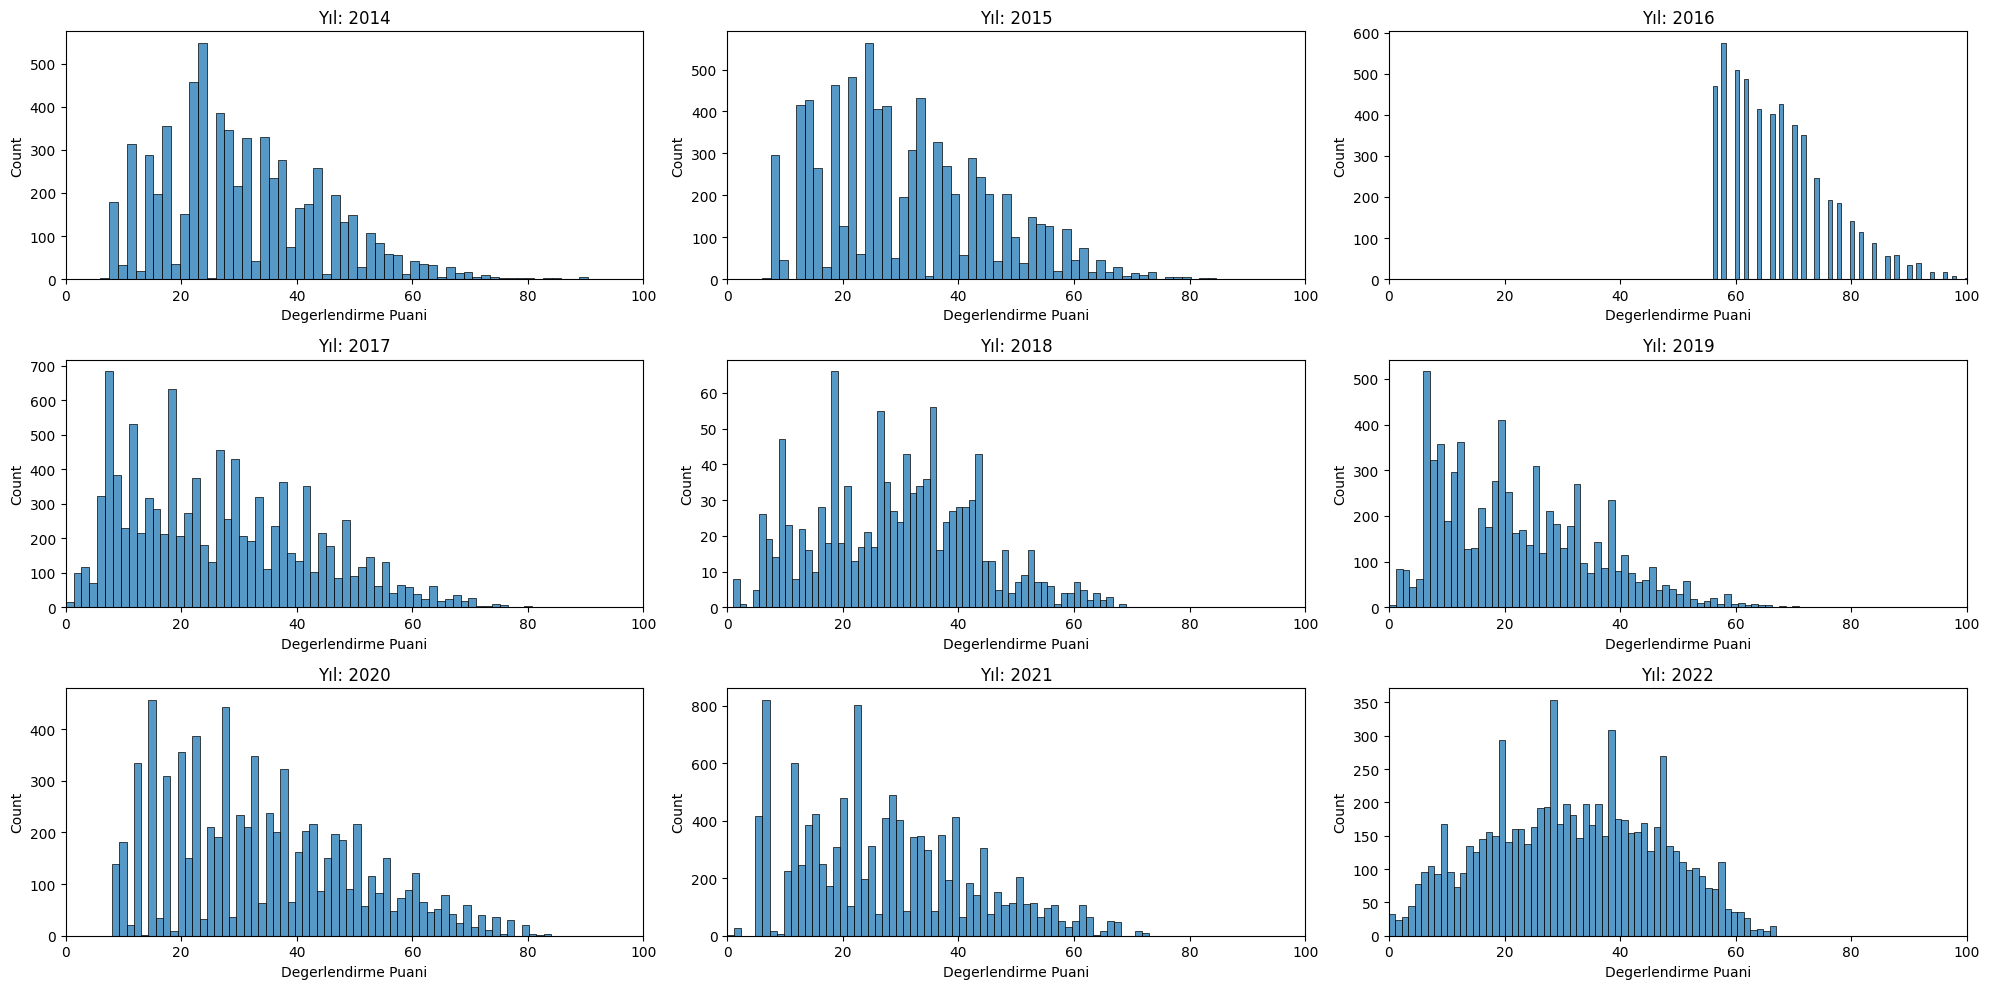

In [13]:
years = range(2014, 2023)

# Histogramları çizme
f, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
ax = ax.flatten()

for i, year in enumerate(years):
    if i < len(ax):
        sns.histplot(train[train['Basvuru Yili'] == year], x='Degerlendirme Puani', bins=60, ax=ax[i])
        ax[i].set_title(f'Yıl: {year}')
        ax[i].set_xlim(0, 100)  # x eksenini 0 ile 100 arasında sınırla

# Boş kalan subplots'ları kapatma
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [37]:
# 2016 yılına ait verileri seçme
train_2016 = train[train['Basvuru Yili'] == 2016]

# 2016 yılı verilerini 3 kat artırma
train_2016_expanded = pd.concat([train_2016] * 3, ignore_index=True)

# Orijinal veri setine ekleme
train = pd.concat([train, train_2016_expanded], ignore_index=True)

In [44]:
oof_data, non_oof_train_data = train_test_split(train, test_size=0.9, random_state = 42)

kf = KFold(n_splits=10)

cv_scores = []

        
for fold, (train_index, test_index) in enumerate(kf.split(non_oof_train_data[training_columns]), 1):     
    print("*" * 50)
    print(f"FOLD: {fold}")

    X_train_fold, X_test_fold = non_oof_train_data.iloc[train_index], non_oof_train_data.iloc[test_index]
    y_train_fold, y_test_fold = X_train_fold['Degerlendirme Puani'], X_test_fold['Degerlendirme Puani']

    train_pool = Pool(X_train_fold[training_columns], 
                      y_train_fold, cat_features=categorical_columns)
    test_pool = Pool(X_test_fold[training_columns],
                     y_test_fold, cat_features=categorical_columns)

    model = CatBoostRegressor(learning_rate=0.175, task_type='GPU', loss_function='RMSE', cat_features=categorical_columns, iterations=1000, verbose=100, random_state=42)
    model.fit(train_pool)

    # Test seti üzerinde tahmin yapma
    y_pred = model.predict(X_test_fold[training_columns])

    # RMSE hesaplama
    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
    print(f"\{fold}_rmse: {rmse:.4f}")
    cv_scores.append(rmse)

model = CatBoostRegressor(learning_rate=0.175, task_type='GPU', loss_function='RMSE', cat_features=categorical_columns, iterations=1000, verbose=100, random_state=42)
train_pool_oof = Pool(oof_data[training_columns], 
                  oof_data['Degerlendirme Puani'], cat_features=categorical_columns)
model.fit(train_pool_oof)

y_pred_oof = model.predict(oof_data[training_columns])
rmse_oof = np.sqrt(mean_squared_error(oof_data['Degerlendirme Puani'], y_pred_oof))

print(f"\naverage_rmse: {np.mean(cv_scores):.4f}")
print(f"oof_rmse: {rmse_oof:.4f}")

**************************************************
FOLD: 1
0:	learn: 18.5659881	total: 191ms	remaining: 3m 10s
100:	learn: 5.0877885	total: 11.5s	remaining: 1m 42s
200:	learn: 4.9300901	total: 20.6s	remaining: 1m 21s
300:	learn: 4.8322213	total: 29.7s	remaining: 1m 8s
400:	learn: 4.7433158	total: 39.1s	remaining: 58.4s
500:	learn: 4.6664076	total: 48.5s	remaining: 48.3s
600:	learn: 4.5938128	total: 57.8s	remaining: 38.4s
700:	learn: 4.5322105	total: 1m 7s	remaining: 28.6s
800:	learn: 4.4652090	total: 1m 17s	remaining: 19.2s
900:	learn: 4.4059515	total: 1m 27s	remaining: 9.56s
999:	learn: 4.3400275	total: 1m 38s	remaining: 0us
\1_rmse: 5.1406
**************************************************
FOLD: 2
0:	learn: 18.5597783	total: 118ms	remaining: 1m 57s
100:	learn: 5.1124281	total: 10.9s	remaining: 1m 37s
200:	learn: 4.9473077	total: 21.6s	remaining: 1m 25s
300:	learn: 4.8416443	total: 32.2s	remaining: 1m 14s
400:	learn: 4.7604391	total: 43.1s	remaining: 1m 4s
500:	learn: 4.6847039	total:

In [45]:
X_test = test[training_columns]
    
X_train = train[training_columns]
y_train = train['Degerlendirme Puani']
    
train_pool = Pool(X_train, y_train, cat_features=categorical_columns)

model = CatBoostRegressor(learning_rate=0.175, task_type='GPU', loss_function='RMSE', cat_features=categorical_columns, iterations=1000, verbose=100, random_state=42, early_stopping_rounds=10)

model.fit(train_pool)
    
X_test['y_pred'] = model.predict(X_test[training_columns])
    
print("")

0:	learn: 18.5667968	total: 104ms	remaining: 1m 44s
100:	learn: 5.0953289	total: 9.09s	remaining: 1m 20s
200:	learn: 4.9401055	total: 17.7s	remaining: 1m 10s
300:	learn: 4.8514869	total: 26.1s	remaining: 1m
400:	learn: 4.7749612	total: 34.7s	remaining: 51.8s
500:	learn: 4.7076711	total: 44.4s	remaining: 44.2s
600:	learn: 4.6458160	total: 53.6s	remaining: 35.6s
700:	learn: 4.5921917	total: 1m 3s	remaining: 27s
800:	learn: 4.5350238	total: 1m 11s	remaining: 17.8s
900:	learn: 4.4755104	total: 1m 19s	remaining: 8.79s
999:	learn: 4.4156247	total: 1m 29s	remaining: 0us



In [49]:
X_test['id'] = b['id']

X_test.rename(columns = {'y_pred' : 'Degerlendirme Puani'}, inplace = True)

final = X_test[['id','Degerlendirme Puani']]

final.to_csv('bu daha iyi olcek.csv', index = False)

In [50]:
deneme = final.copy()

In [51]:
deneme['Degerlendirme Puani'] = np.round(deneme['Degerlendirme Puani'])

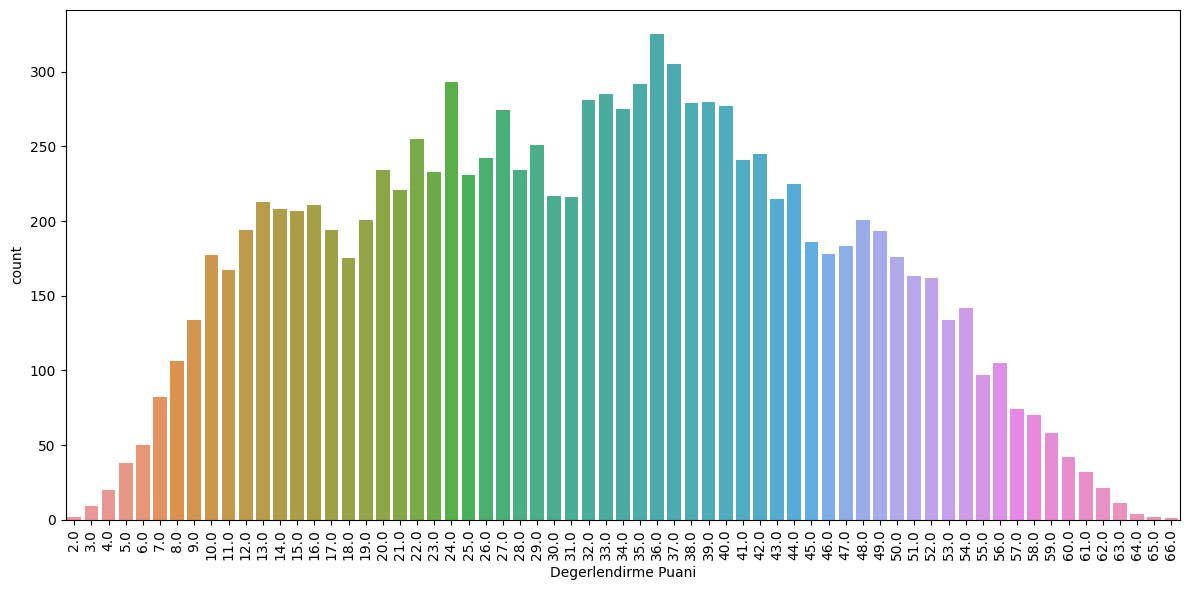

In [55]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = deneme, x = 'Degerlendirme Puani', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()